# I. Import Libraries, Preferences, and Helper Functions

## Libraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

# Dataset URL
DATASETURL = 'https://raw.githubusercontent.com/aelluminate/databank/refs/heads/main/2024-10/student-performance/student-performance.csv'

## Helper Functions

In [37]:
#

# II. Exploratory Data Analysis

In [4]:
# Load the dataset
data = pd.read_csv(DATASETURL)

# Preview the first 5 rows
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
# Display the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# Display the dataset statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [7]:
# Preview dataset numerical and categorical columns
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include='object').columns

print(f'Numerical Columns\n{num_cols}\n')
print(f'Categorical Columns\n{cat_cols}')

Numerical Columns
Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

Categorical Columns
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [8]:
# Summation of missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
# Summation of duplicated rows
data.duplicated().sum()

np.int64(0)

### Correlational Analysis

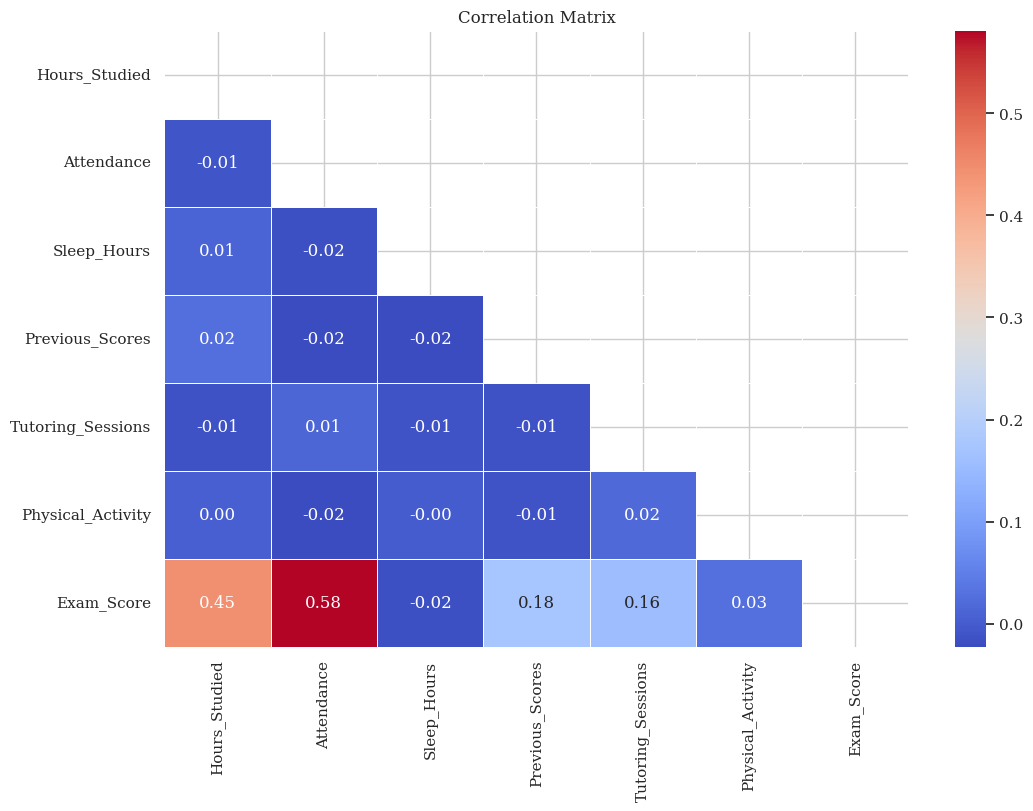

In [12]:
numerical_data = data[num_cols]
corr = numerical_data.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, fmt='.2f', linewidths=0.5, mask=np.triu(corr))

# Set the title
ax.set_title('Correlation Matrix')

# Display the plot
plt.show()

### Relationship Between Hours Studied and Exam Score by Attendance

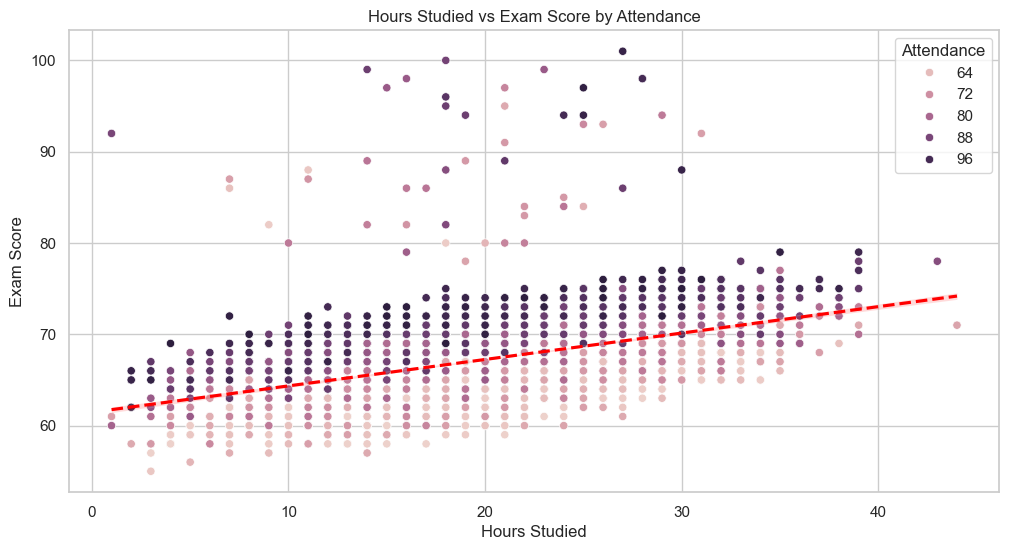

In [46]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the relationship between hours studied and exam score
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', ax=ax, hue='Attendance')

# Add a trend line
sns.regplot(data=data, x='Hours_Studied', y='Exam_Score', ax=ax, scatter=False, color='red', line_kws={'linestyle':'--'})

# Set the title and labels
ax.set_title('Hours Studied vs Exam Score by Attendance')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Exam Score')

# Display the plot
plt.show()

### Student's Attendance Based on their Distance from Home

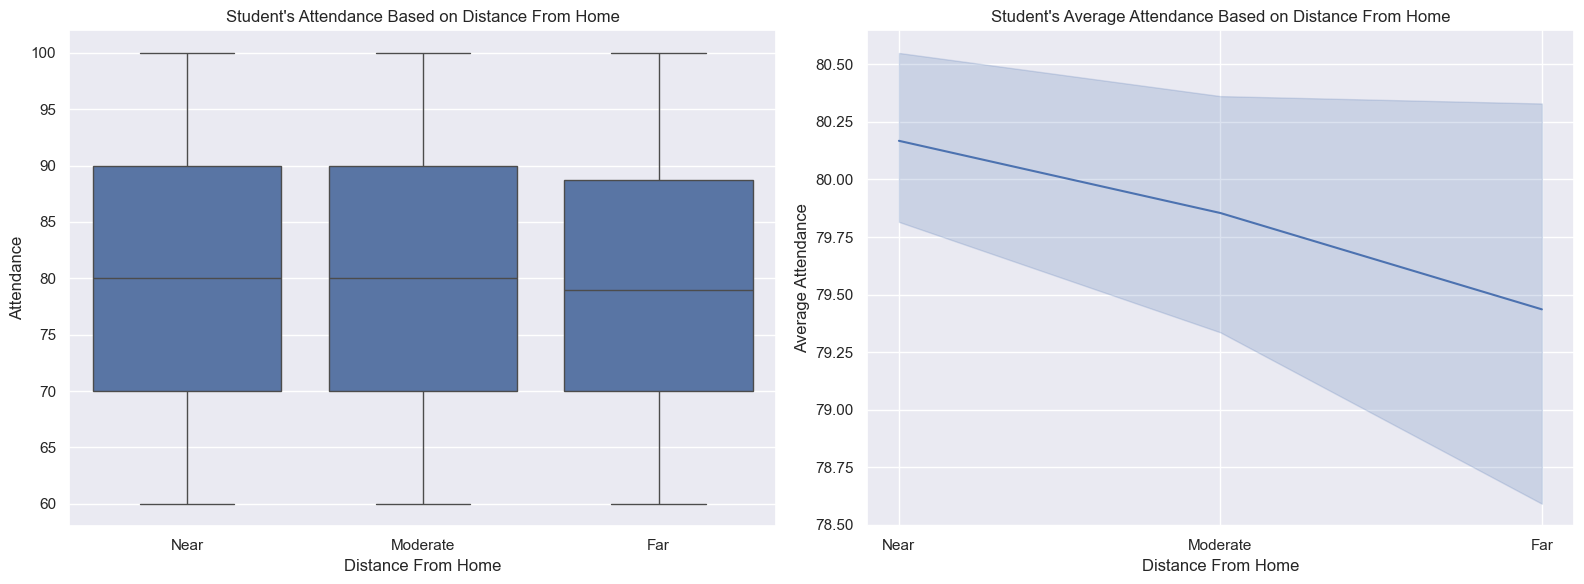

In [45]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between student's attendance and distance from home
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Distance_from_Home', y='Attendance')
plt.title('Student\'s Attendance Based on Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Attendance')

# Plot the relationship between student's attendance and distance from home
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Distance_from_Home', y='Attendance')
plt.title('Student\'s Average Attendance Based on Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Average Attendance')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Parental Involvement

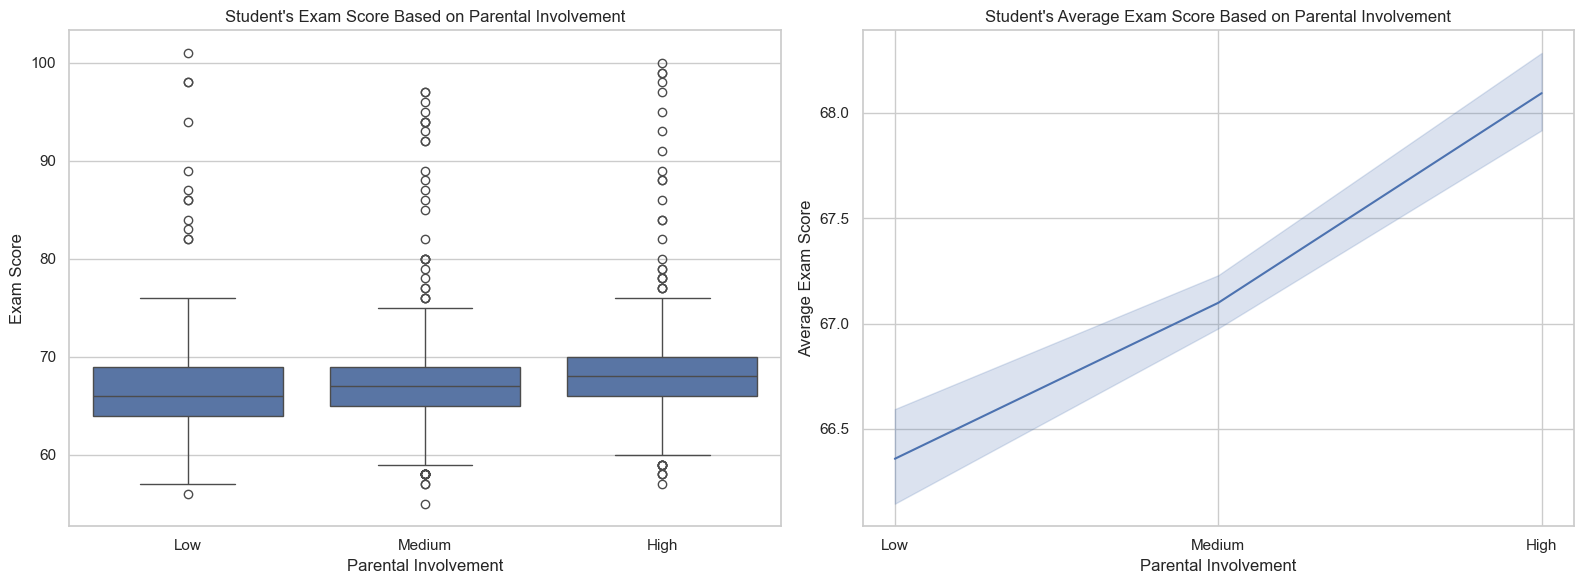

In [47]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between parental involvement and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Parental_Involvement', y='Exam_Score') 
plt.title('Student\'s Exam Score Based on Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')

# Plot the relationship between parental involvement and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Parental_Involvement', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Family Income 

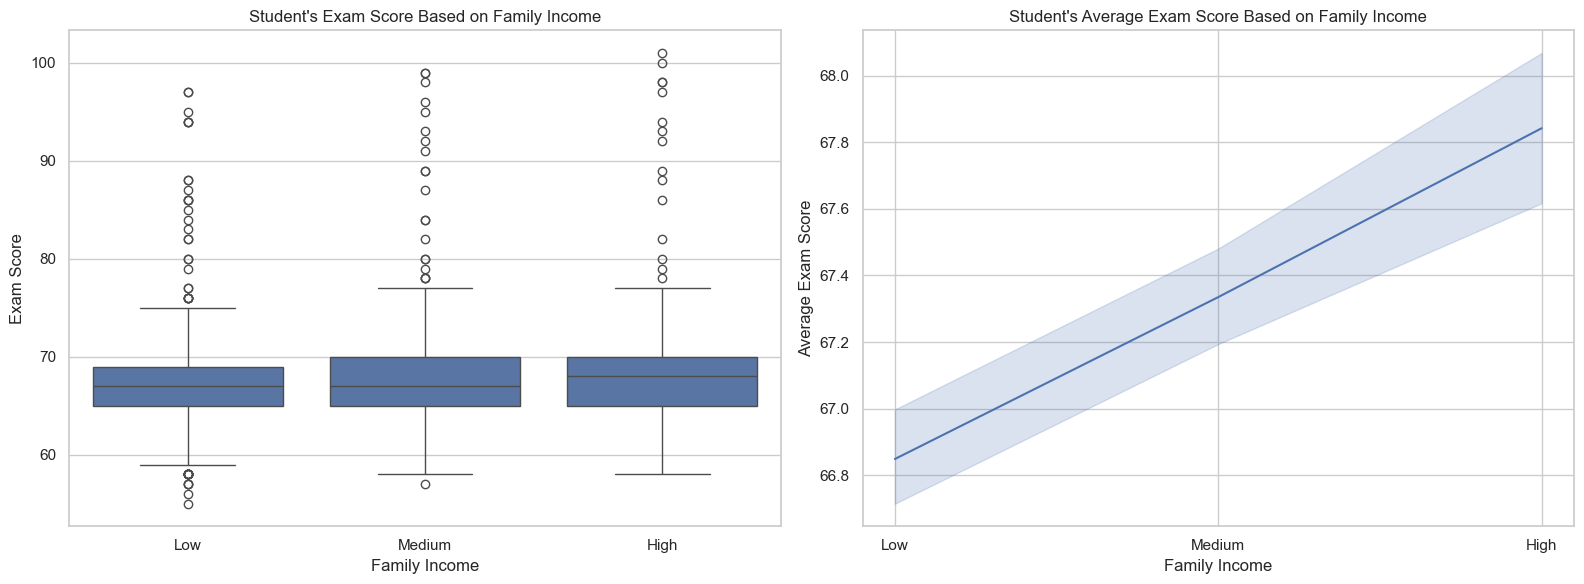

In [48]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between family income and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Family_Income', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Family Income')
plt.xlabel('Family Income')
plt.ylabel('Exam Score')

# Plot the relationship between family income and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Family_Income', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Family Income')
plt.xlabel('Family Income')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Student's Attendance 

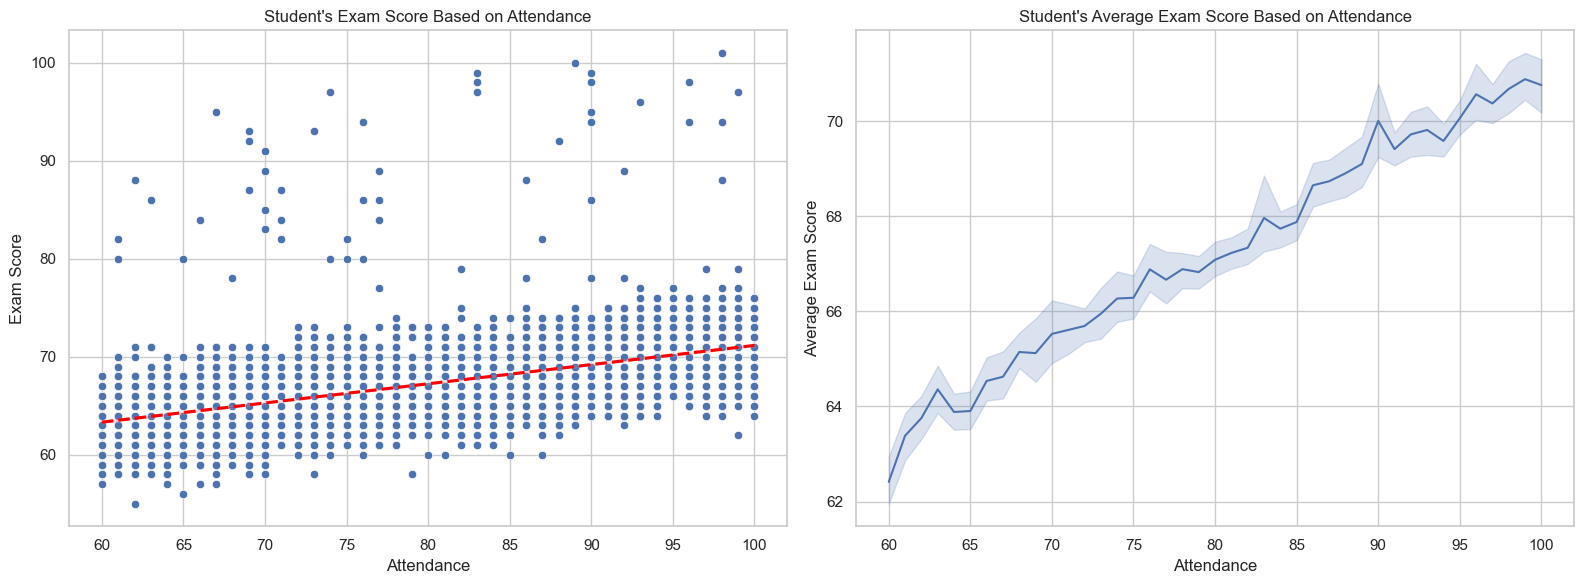

In [49]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between attendance and exam score
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Attendance', y='Exam_Score')
sns.regplot(data=data, x='Attendance', y='Exam_Score', scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('Student\'s Exam Score Based on Attendance')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')

# Plot the relationship between attendance and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Attendance', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Attendance')
plt.xlabel('Attendance')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Hours Studied

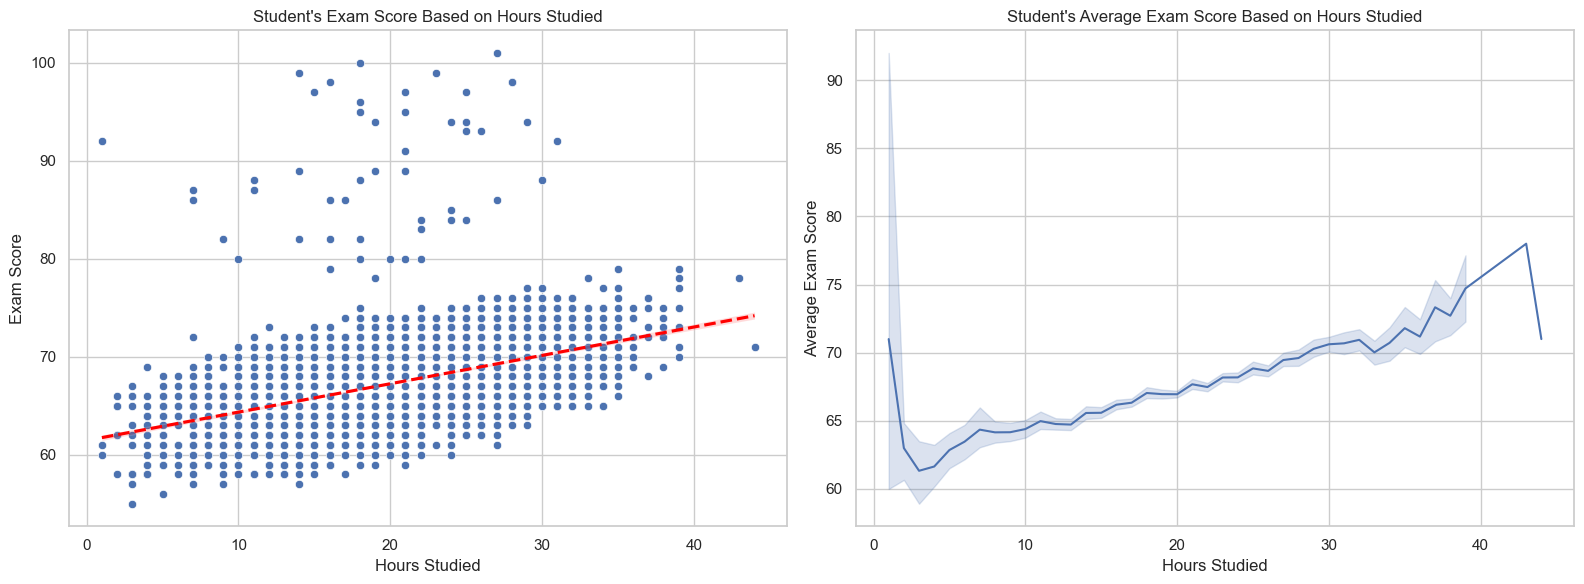

In [50]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between hours studied and exam score
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score')
sns.regplot(data=data, x='Hours_Studied', y='Exam_Score', scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('Student\'s Exam Score Based on Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

# Plot the relationship between hours studied and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Hours_Studied', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Sleep Hours 

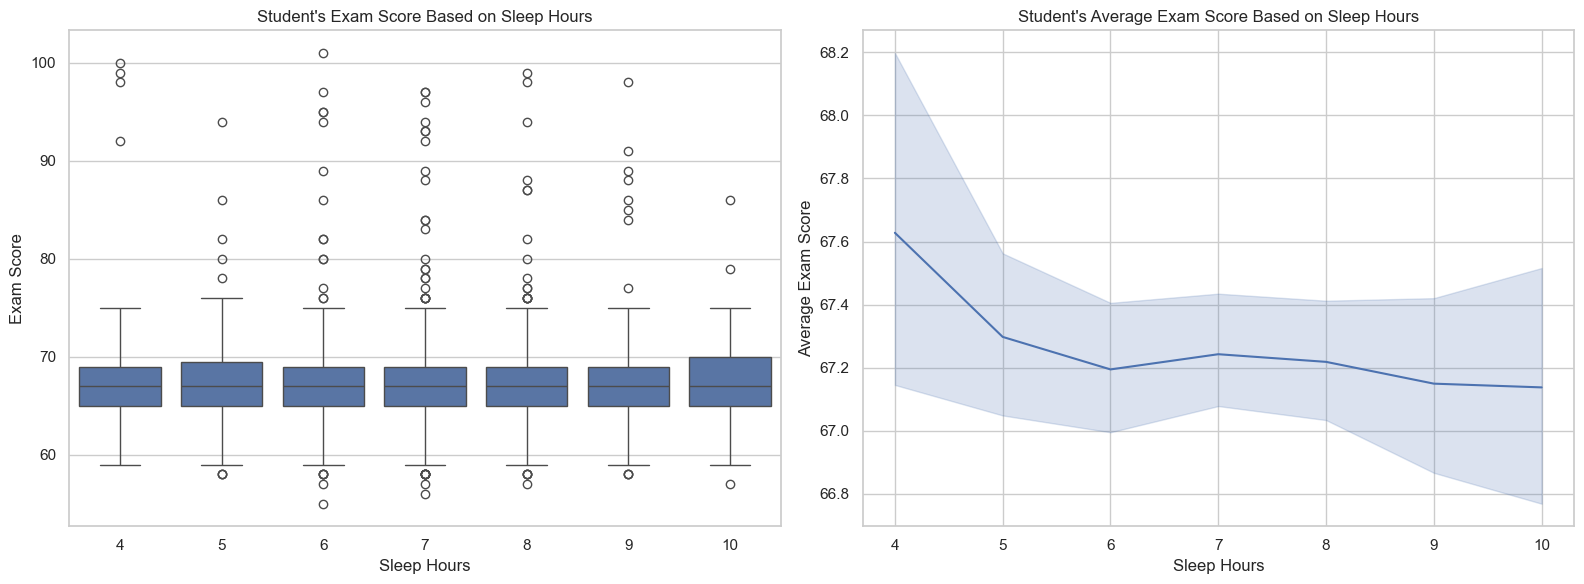

In [51]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between sleep hours and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Sleep_Hours', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')

# Plot the relationship between sleep hours and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Sleep_Hours', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Tutoring Sessions

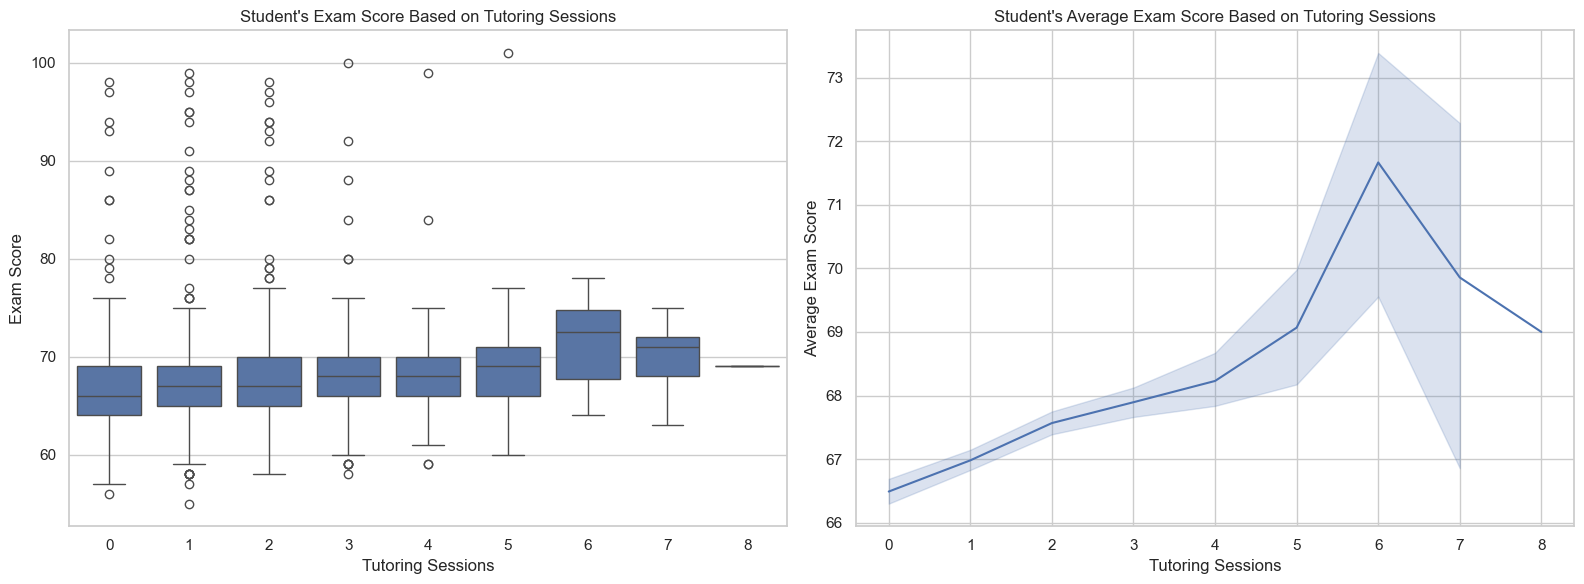

In [52]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between tutoring sessions and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Tutoring_Sessions', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Tutoring Sessions')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')

# Plot the relationship between tutoring sessions and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Tutoring_Sessions', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Tutoring Sessions')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Parental Education Level

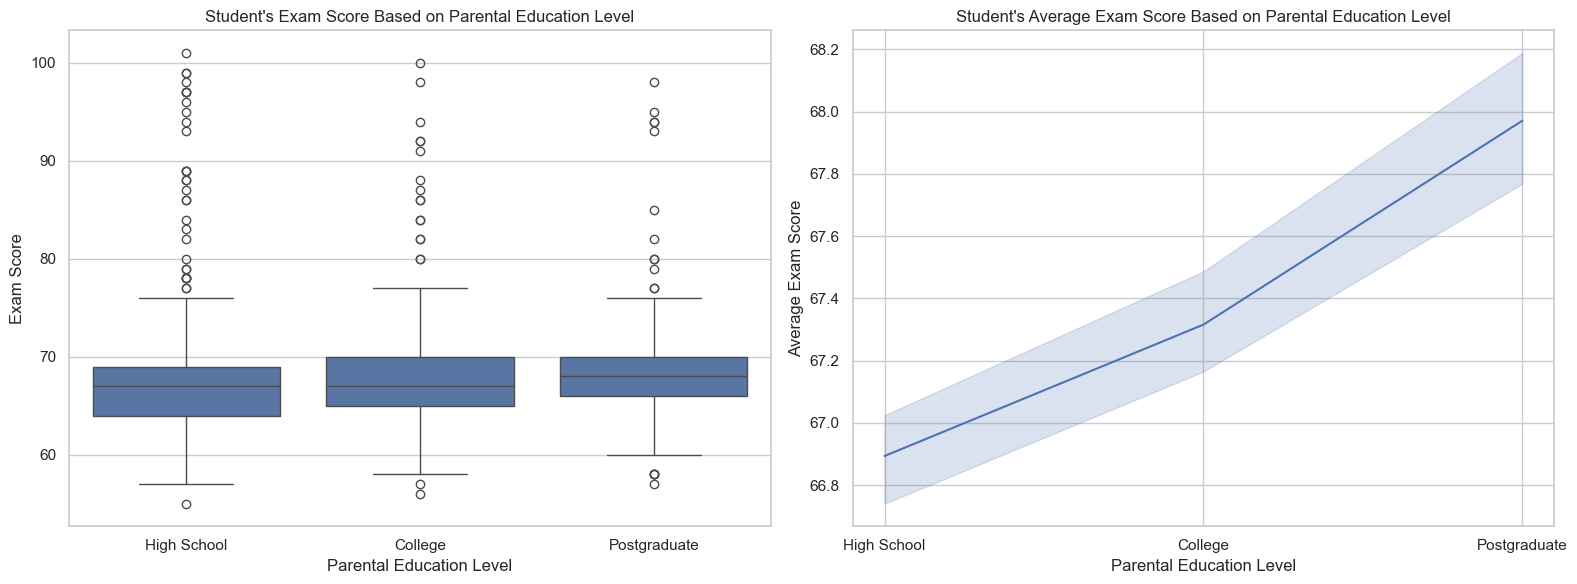

In [53]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between parental education level and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Parental_Education_Level', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')

# Plot the relationship between parental education level and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Parental_Education_Level', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Peer Influence

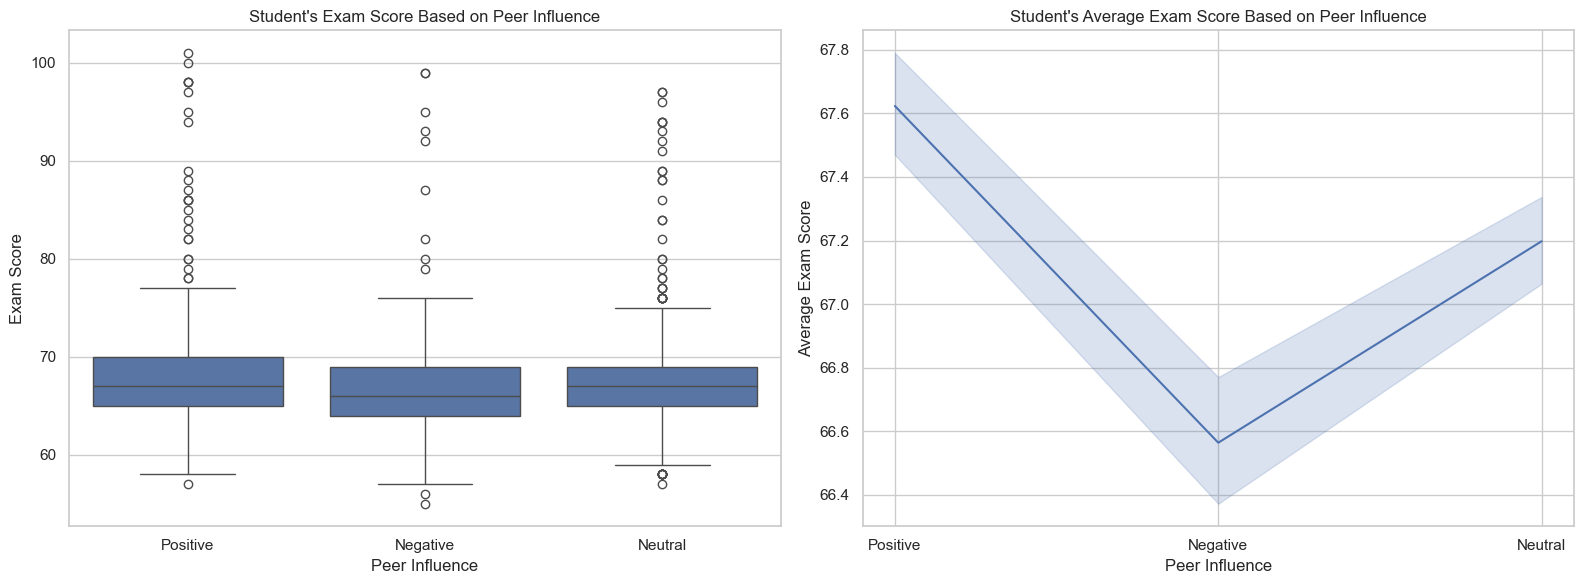

In [54]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between peer influence and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Peer_Influence', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Peer Influence')
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')

# Plot the relationship between peer influence and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Peer_Influence', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Peer Influence')
plt.xlabel('Peer Influence')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Internet Access

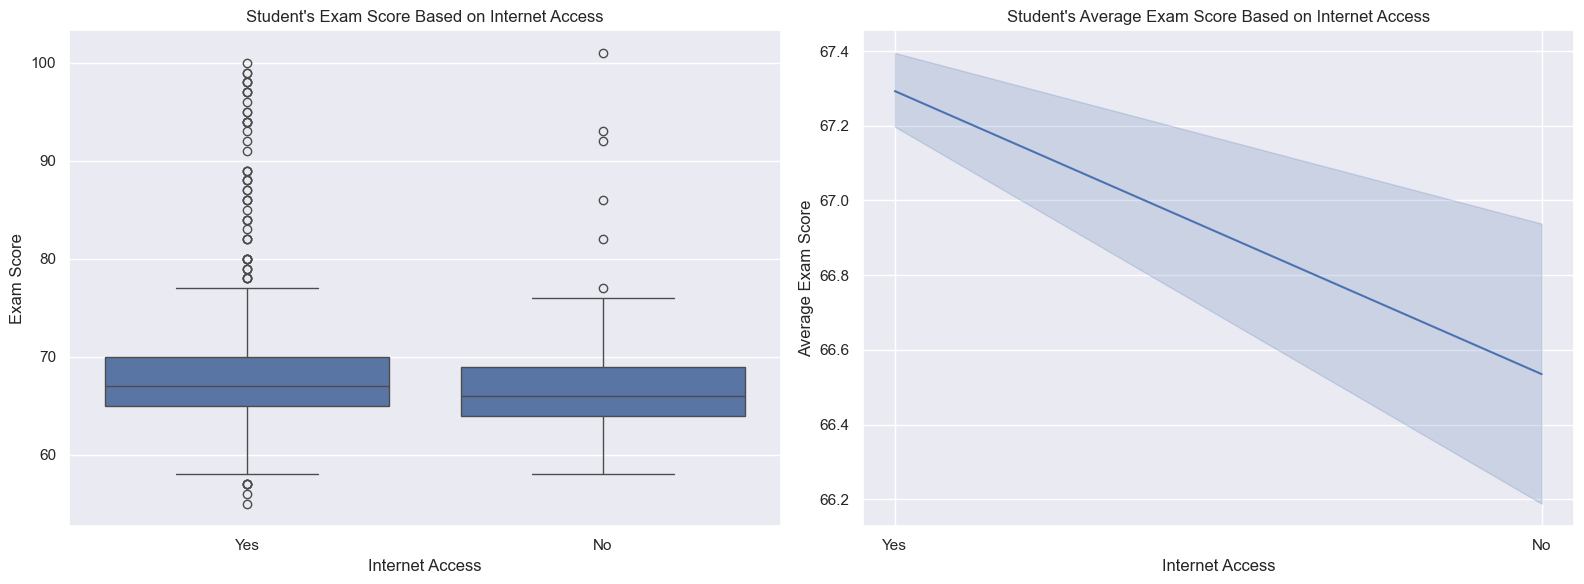

In [23]:
# Create a figure and axis  
plt.figure(figsize=(16, 6))

# Plot the relationship between internet access and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Internet_Access', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Exam Score')

# Plot the relationship between internet access and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Internet_Access', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()


### Percentage of Students with Internet Access

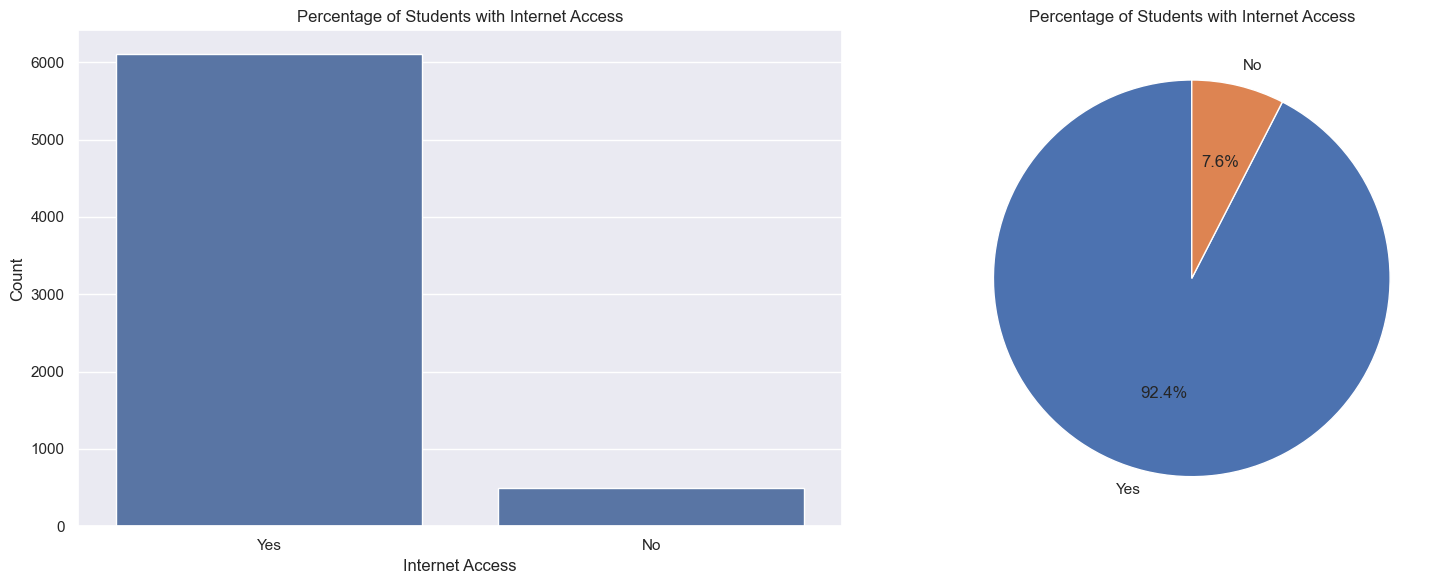

In [28]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the percentage of students with internet access
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Internet_Access', ax=plt.gca())
plt.title('Percentage of Students with Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Count')

# Plot the percentage of students with internet access
plt.subplot(1, 2, 2)
plt.pie(data['Internet_Access'].value_counts(), labels=data['Internet_Access'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students with Internet Access')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Extracurricular Activities

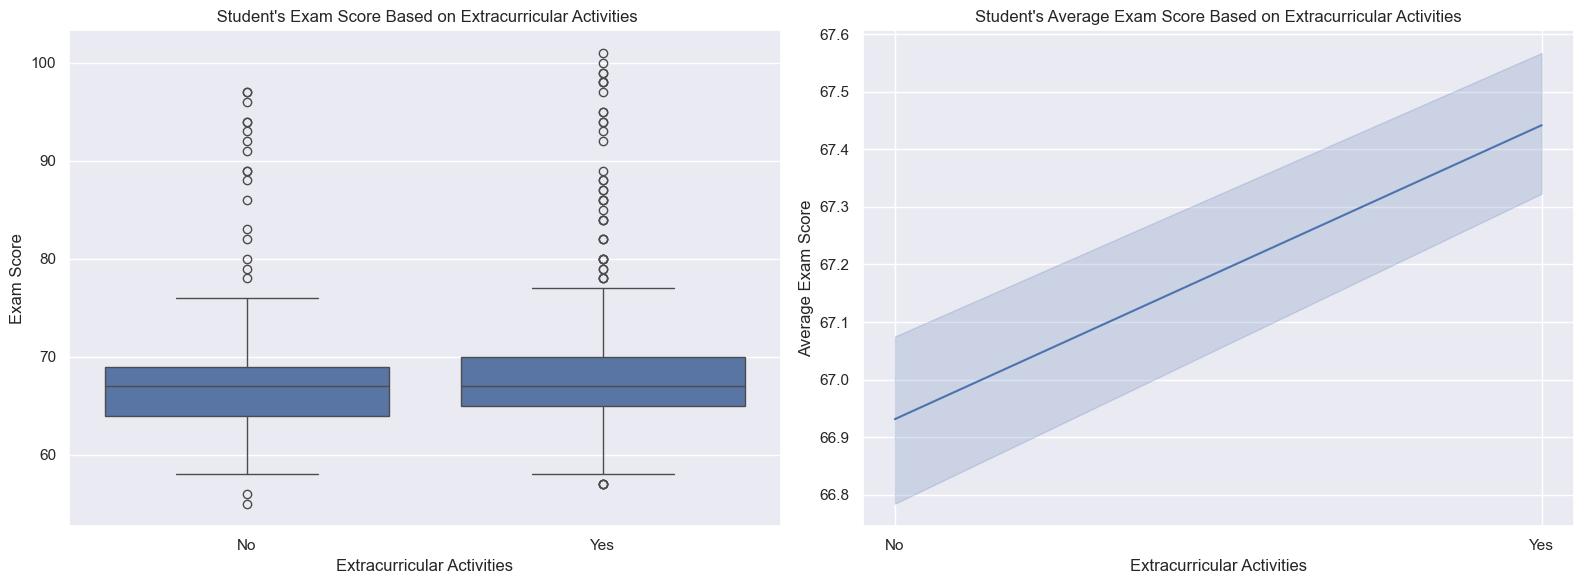

In [29]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between extracurricular activities and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Extracurricular_Activities', y='Exam_Score')
plt.title(' Student\'s Exam Score Based on Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')

# Plot the relationship between extracurricular activities and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Extracurricular_Activities', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Percentage of Students joined Extracurricular Activities

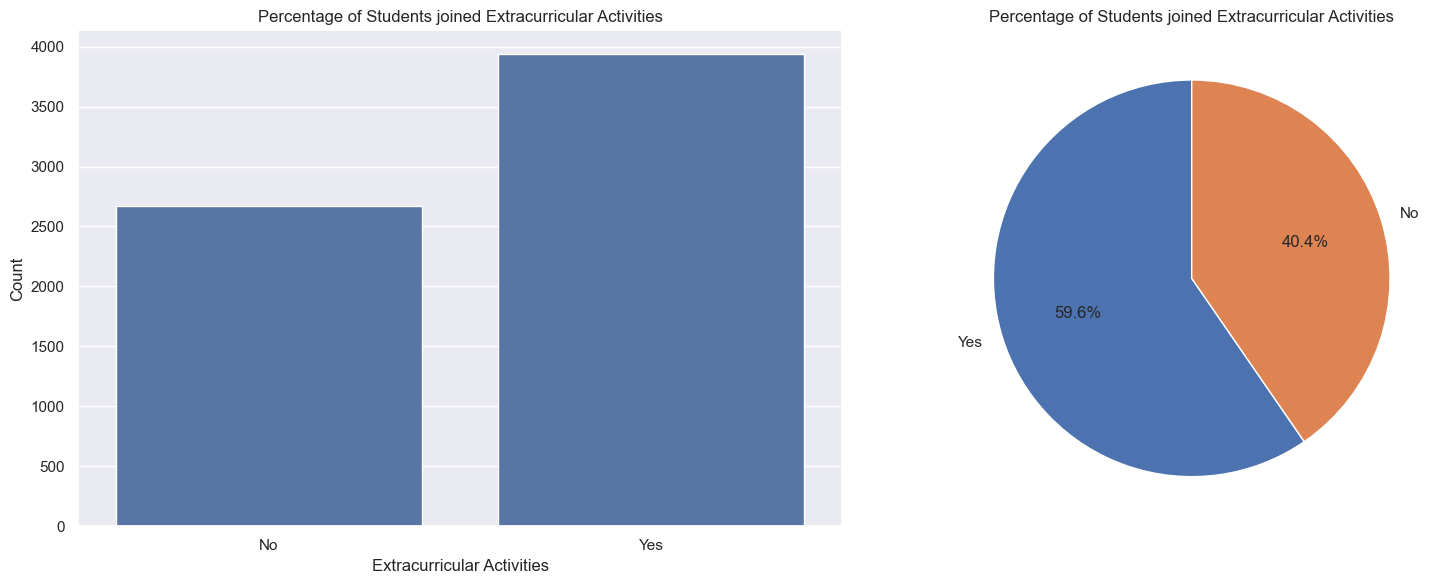

In [30]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the percentage of students joined extracurricular activities
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Extracurricular_Activities', ax=plt.gca())
plt.title('Percentage of Students joined Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')

# Plot the percentage of students joined extracurricular activities
plt.subplot(1, 2, 2)
plt.pie(data['Extracurricular_Activities'].value_counts(), labels=data['Extracurricular_Activities'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students joined Extracurricular Activities')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based  on Physical Activity

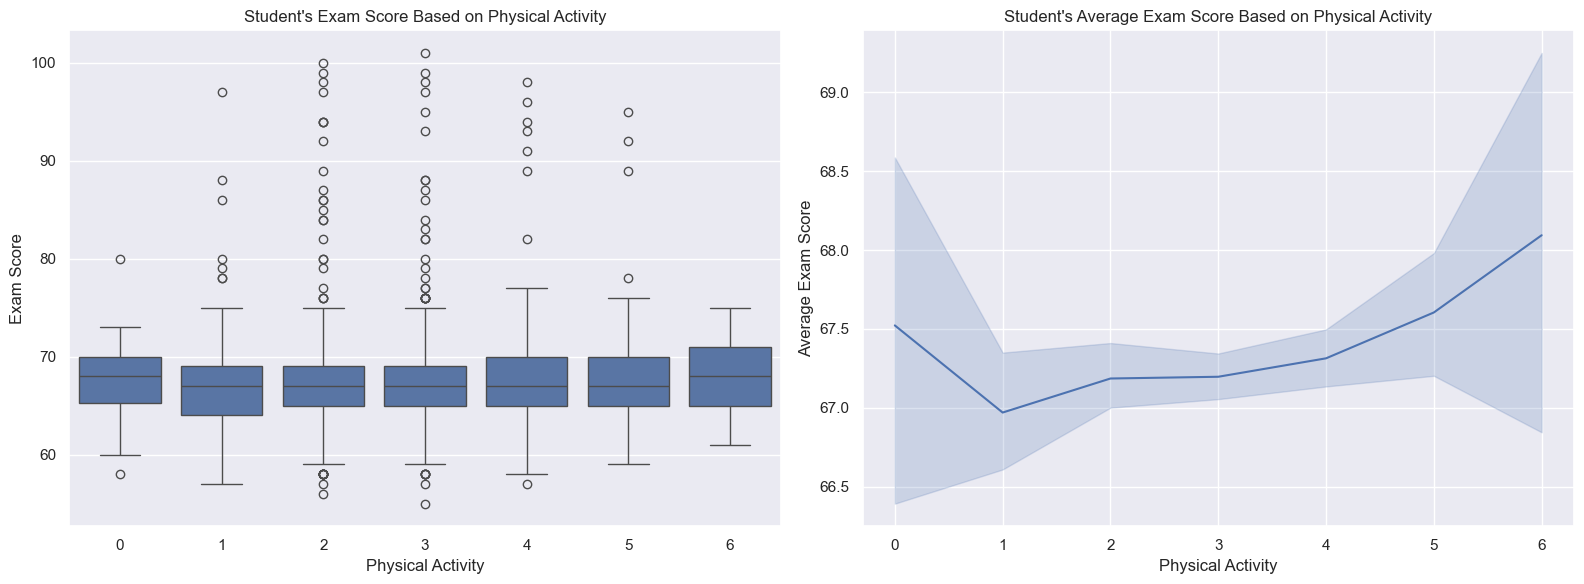

In [31]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between physical activity and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Physical_Activity', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Exam Score')

# Plot the relationship between physical activity and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Physical_Activity', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Student's Exam Score Based on Learning Disabilities

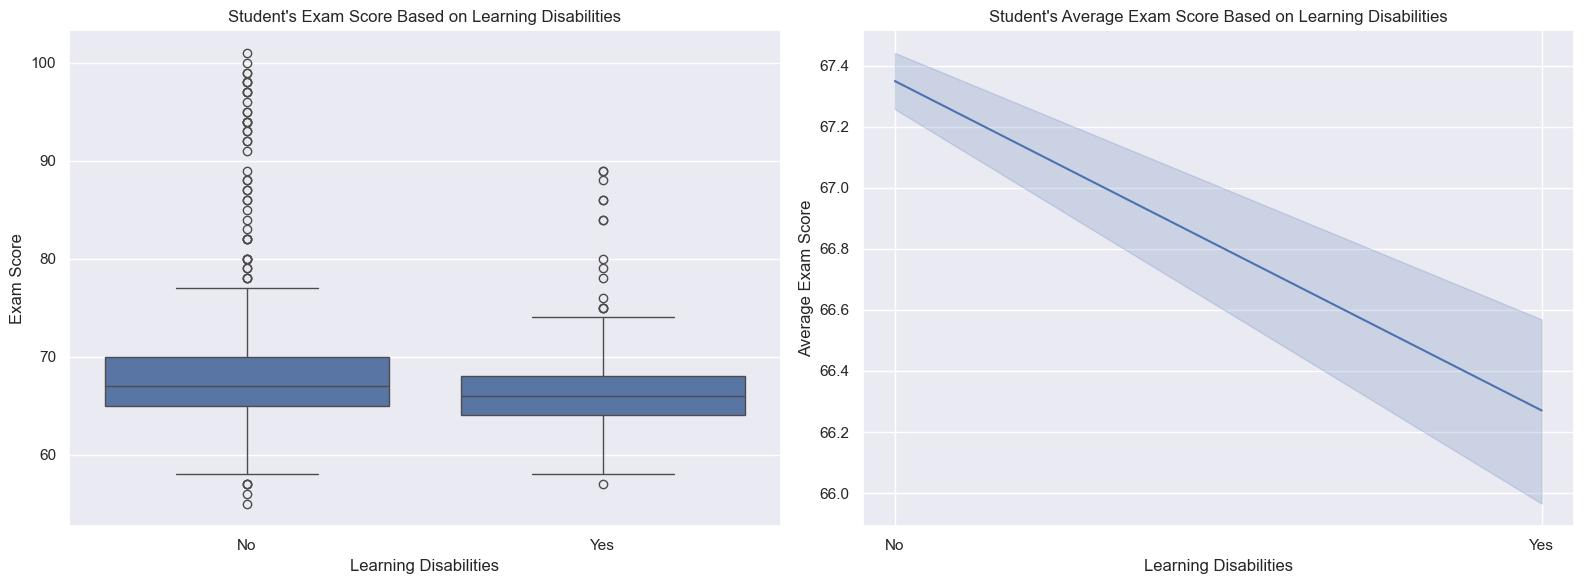

In [36]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the relationship between learning disability and exam score
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Learning_Disabilities', y='Exam_Score')
plt.title('Student\'s Exam Score Based on Learning Disabilities')
plt.xlabel('Learning Disabilities')
plt.ylabel('Exam Score')

# Plot the relationship between learning disability and students' average exam score
plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Learning_Disabilities', y='Exam_Score')
plt.title('Student\'s Average Exam Score Based on Learning Disabilities')
plt.xlabel('Learning Disabilities')
plt.ylabel('Average Exam Score')

# Display the plot
plt.tight_layout()
plt.show()

### Percentage of Students with Learning Disabilities

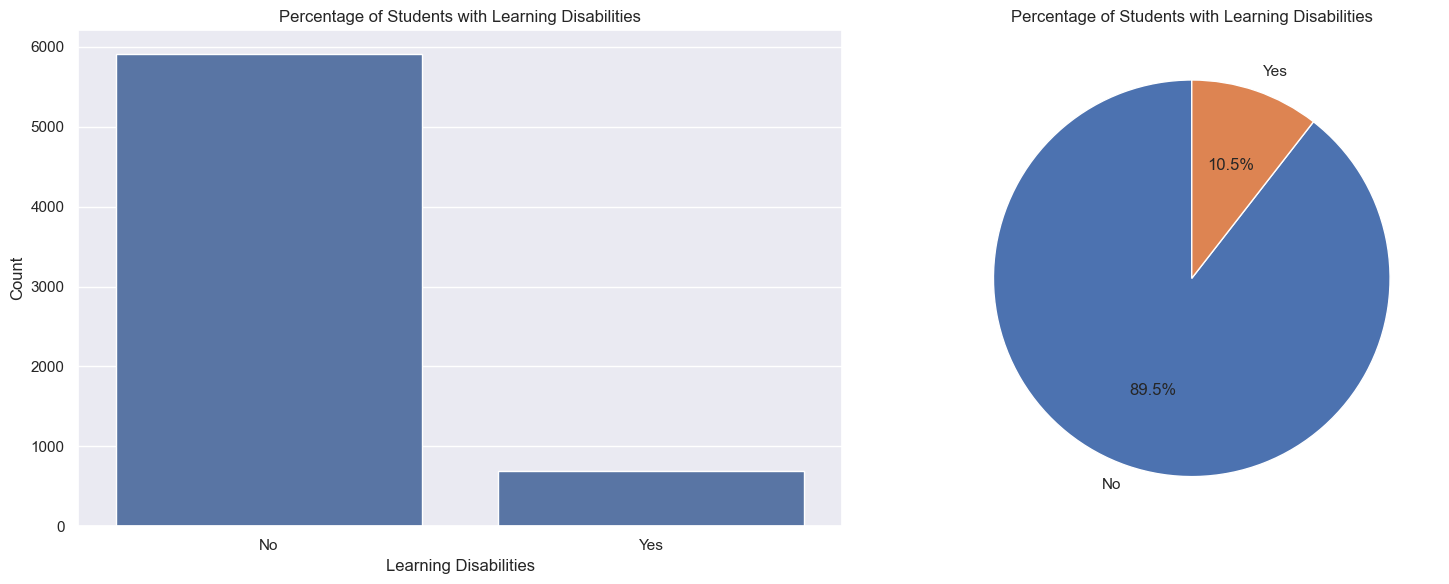

In [35]:
# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the percentage of students with learning disabilities
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Learning_Disabilities', ax=plt.gca())
plt.title('Percentage of Students with Learning Disabilities')
plt.xlabel('Learning Disabilities')
plt.ylabel('Count')

# Plot the percentage of students with learning disabilities
plt.subplot(1, 2, 2)
plt.pie(data['Learning_Disabilities'].value_counts(), labels=data['Learning_Disabilities'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Students with Learning Disabilities')

# Display the plot
plt.tight_layout()
plt.show()